In [1]:
import pandas as pd # data preprocessing
import itertools # confusion matrix
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
# To show all the rows of pandas dataframe
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv("drugsComTrain_raw.tsv",sep="\t")
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [3]:
conditions = dict(df['condition'].value_counts())
top_conditions = list(conditions.keys())[:10]
top_values = list(conditions.values())[:10]

In [24]:
top_values

[28788, 9069, 6145, 5904, 5588, 4224, 3673, 3609, 3568, 3383]

In [4]:
top_conditions

['Birth Control',
 'Depression',
 'Pain',
 'Anxiety',
 'Acne',
 'Bipolar Disorde',
 'Insomnia',
 'Weight Loss',
 'Obesity',
 'ADHD']

C:\Users\BaAr349\AppData\Local\Temp\ipykernel_37448\1138778472.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_conditions,y=top_values,palette='summer')


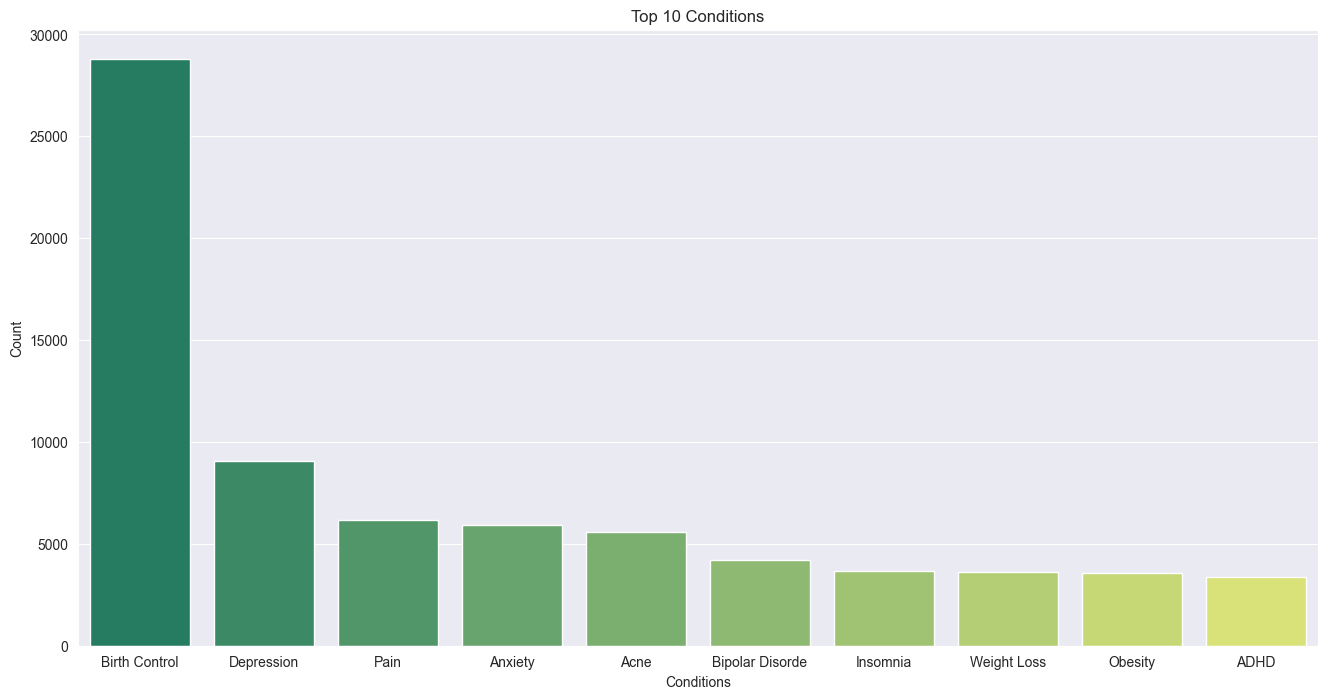

In [5]:
plt.figure(figsize=(16,8))
sns.set_style(style='darkgrid')
sns.barplot(x=top_conditions,y=top_values,palette='summer')
plt.title('Top 10 Conditions')
plt.xlabel('Conditions')
plt.ylabel('Count')
plt.show()

In [6]:
val = []

for c in list(conditions.keys()):
    val.append(df[df['condition']==c]['drugName'].nunique())

drug_for_condition = dict(zip(list(conditions.keys()),val))
drug_for_condition


{'Birth Control': 172,
 'Depression': 105,
 'Pain': 200,
 'Anxiety': 78,
 'Acne': 117,
 'Bipolar Disorde': 80,
 'Insomnia': 78,
 'Weight Loss': 21,
 'Obesity': 38,
 'ADHD': 55,
 'Diabetes, Type 2': 89,
 'Emergency Contraception': 12,
 'High Blood Pressure': 140,
 'Vaginal Yeast Infection': 25,
 'Abnormal Uterine Bleeding': 74,
 'Bowel Preparation': 27,
 'ibromyalgia': 45,
 'Smoking Cessation': 17,
 'Migraine': 59,
 'Anxiety and Stress': 19,
 'Major Depressive Disorde': 49,
 'Constipation': 36,
 'Panic Disorde': 39,
 'Chronic Pain': 53,
 'Migraine Prevention': 50,
 'Urinary Tract Infection': 47,
 'Muscle Spasm': 32,
 'Osteoarthritis': 80,
 'Generalized Anxiety Disorde': 18,
 'Erectile Dysfunction': 16,
 'Opiate Dependence': 9,
 'Irritable Bowel Syndrome': 49,
 'Rheumatoid Arthritis': 98,
 'Allergic Rhinitis': 88,
 'Bacterial Infection': 43,
 'Cough': 41,
 'Sinusitis': 42,
 'Nausea/Vomiting': 39,
 'GERD': 43,
 'Multiple Sclerosis': 39,
 'Overactive Bladde': 28,
 'Hyperhidrosis': 11,
 'He

C:\Users\BaAr349\AppData\Local\Temp\ipykernel_37448\1792940292.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_conditions,y=values,palette='summer')


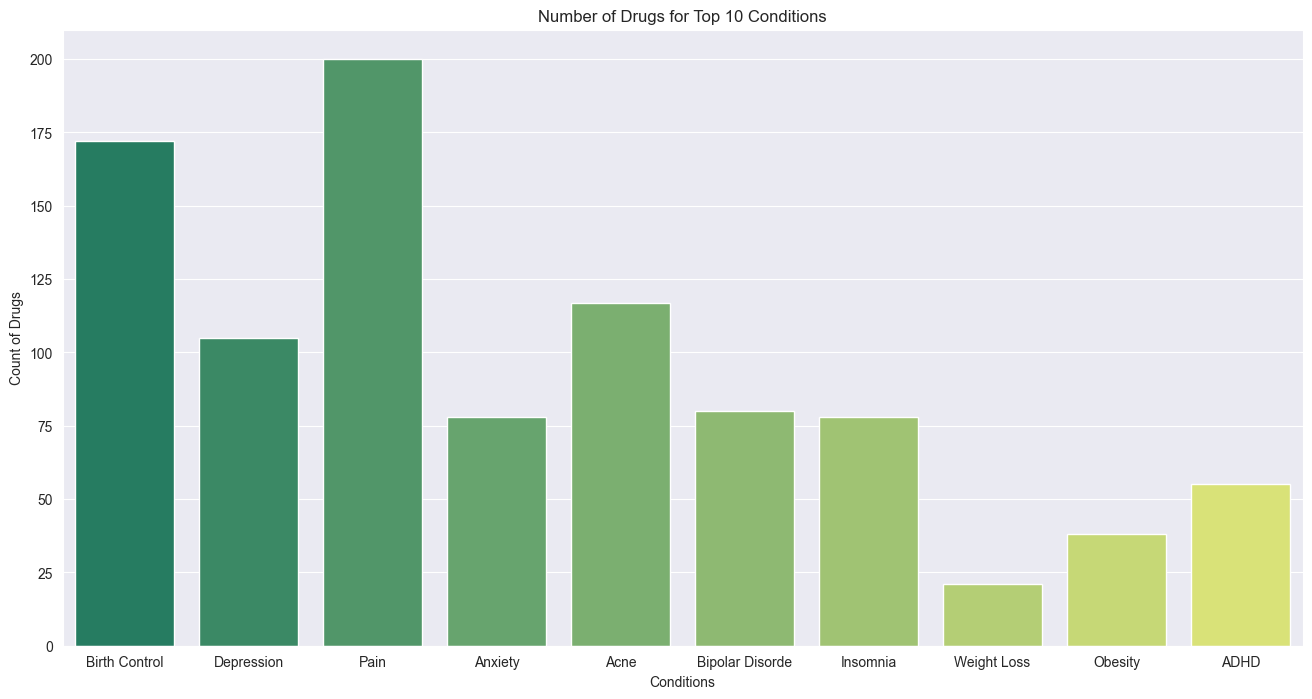

In [7]:
top_conditions = list(drug_for_condition.keys())[0:10]
values = list(drug_for_condition.values())[0:10]
plt.figure(figsize=(16,8))
sns.set_style(style='darkgrid')
sns.barplot(x=top_conditions,y=values,palette='summer')
plt.title('Number of Drugs for Top 10 Conditions')
plt.xlabel('Conditions')
plt.ylabel('Count of Drugs')
plt.show()

C:\Users\BaAr349\AppData\Local\Temp\ipykernel_37448\854129518.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=values,y=top_drugs,palette='summer')


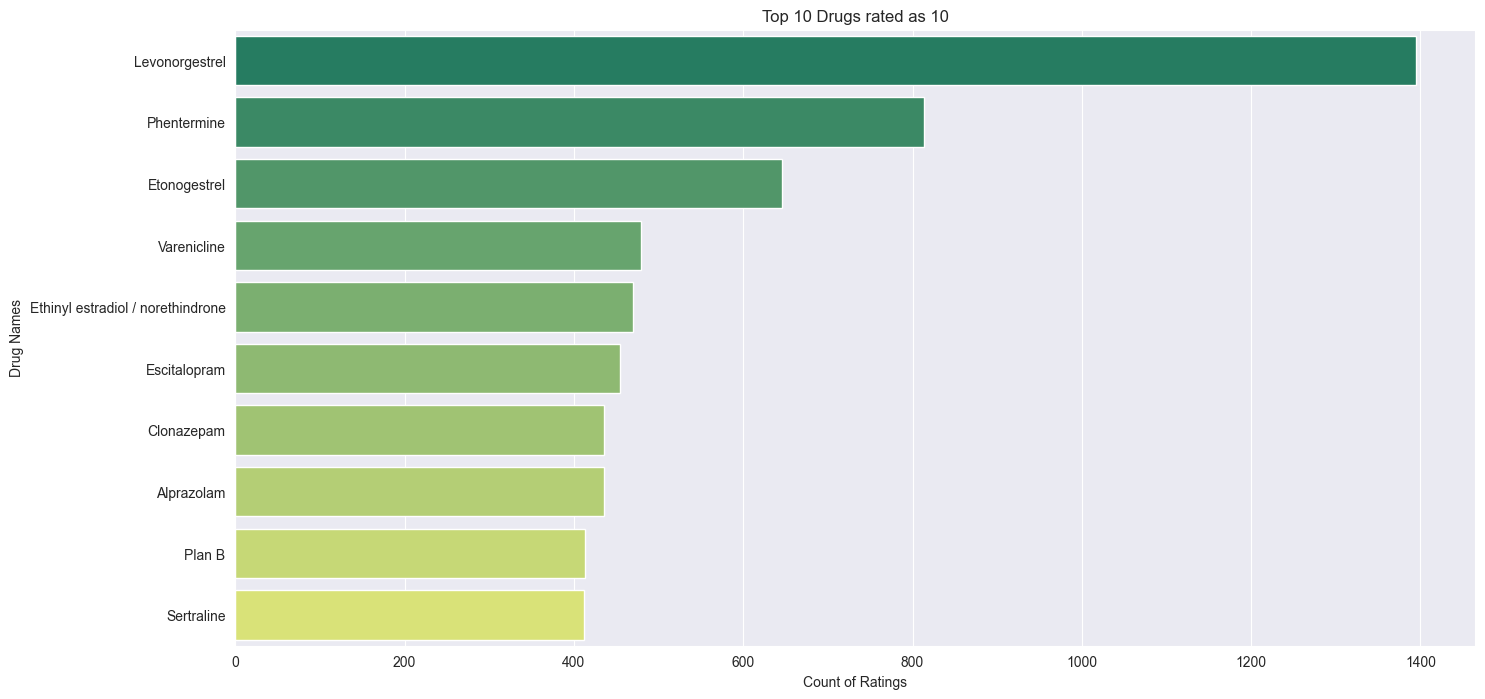

In [8]:
drugs_rating = dict(df[df['rating']==10]['drugName'].value_counts())

top_drugs = list(drugs_rating.keys())[0:10]
values = list(drugs_rating.values())[0:10]
plt.figure(figsize=(16,8))
sns.set_style(style='darkgrid')
sns.barplot(x=values,y=top_drugs,palette='summer')
plt.title('Top 10 Drugs rated as 10')
plt.ylabel('Drug Names')
plt.xlabel('Count of Ratings')
plt.show()

C:\Users\BaAr349\AppData\Local\Temp\ipykernel_37448\2655022839.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=values,y=top_drugs,palette='summer')


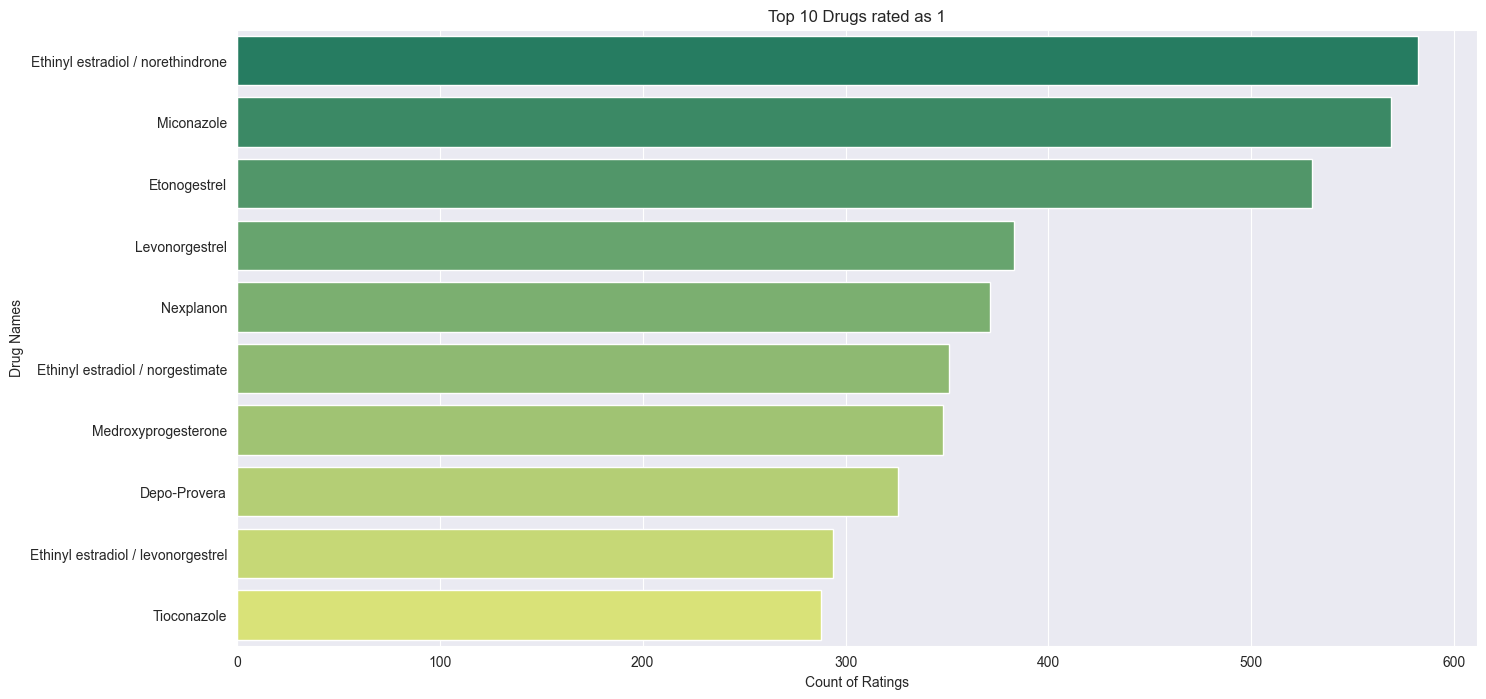

In [9]:
# plotting the top 10 drugs rated as 1
drugs_rating = dict(df[df['rating']==1]['drugName'].value_counts())

top_drugs = list(drugs_rating.keys())[0:10]
values = list(drugs_rating.values())[0:10]
plt.figure(figsize=(16,8))
sns.set_style(style='darkgrid')
sns.barplot(x=values,y=top_drugs,palette='summer')
plt.title('Top 10 Drugs rated as 1')
plt.ylabel('Drug Names')
plt.xlabel('Count of Ratings')
plt.show()

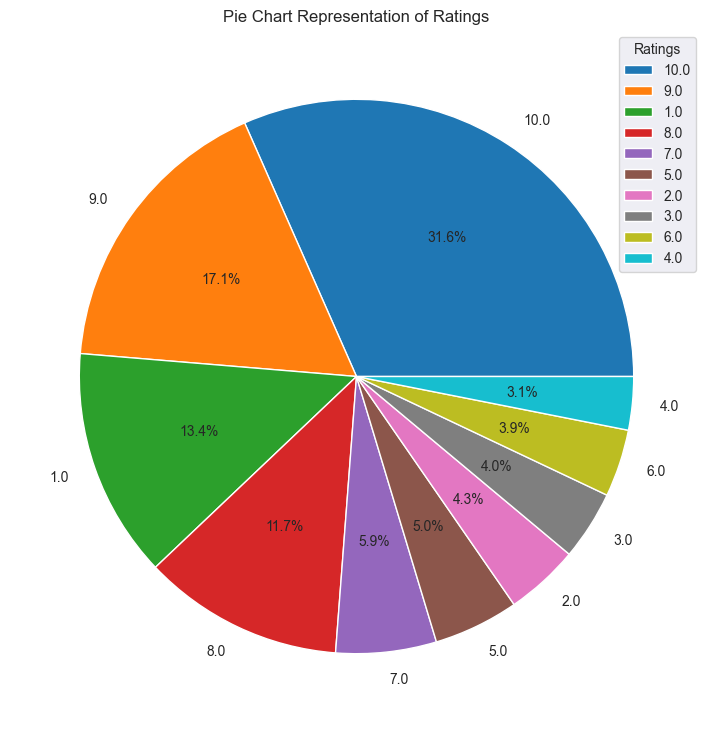

In [10]:
ratings_count = dict(df['rating'].value_counts())
count = list(ratings_count.values())
labels = list(ratings_count.keys())
plt.figure(figsize=(18,9))
plt.pie(count,labels=labels, autopct='%1.1f%%')
plt.title('Pie Chart Representation of Ratings')
plt.legend(title='Ratings')
plt.show()

C:\Users\BaAr349\AppData\Local\Temp\ipykernel_37448\3042130076.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax =sns.distplot(df['usefulCount'])


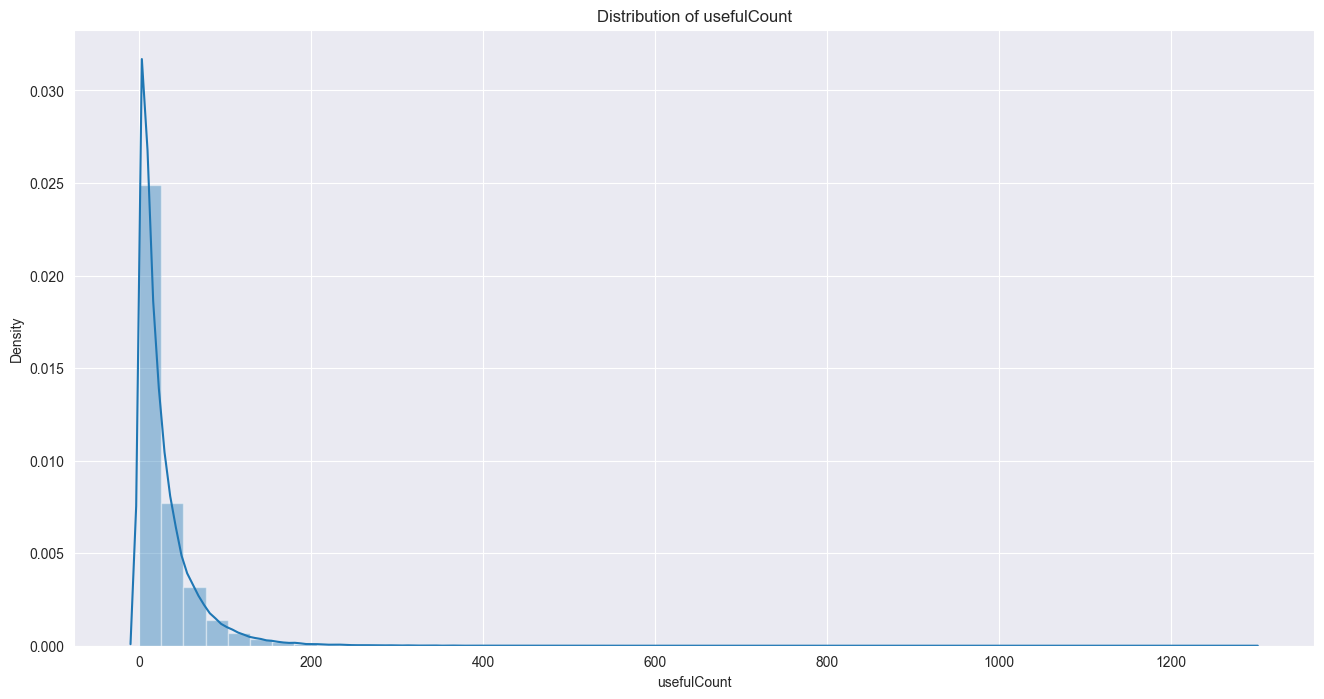

In [11]:
plt.figure(figsize=(16,8))
ax =sns.distplot(df['usefulCount'])

plt.title('Distribution of usefulCount')
plt.show()

In [12]:
df['review_sentiment'] = df['rating'].apply(lambda x: 1 if x > 5 else 0)

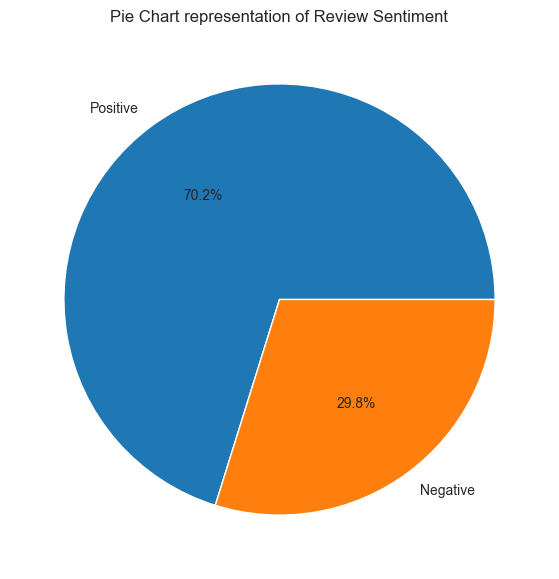

In [13]:
plt.figure(figsize=(14,7))
plt.pie(df['review_sentiment'].value_counts(),labels=['Positive','Negative'],autopct='%1.1f%%')
plt.title('Pie Chart representation of Review Sentiment')
plt.show()

In [14]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


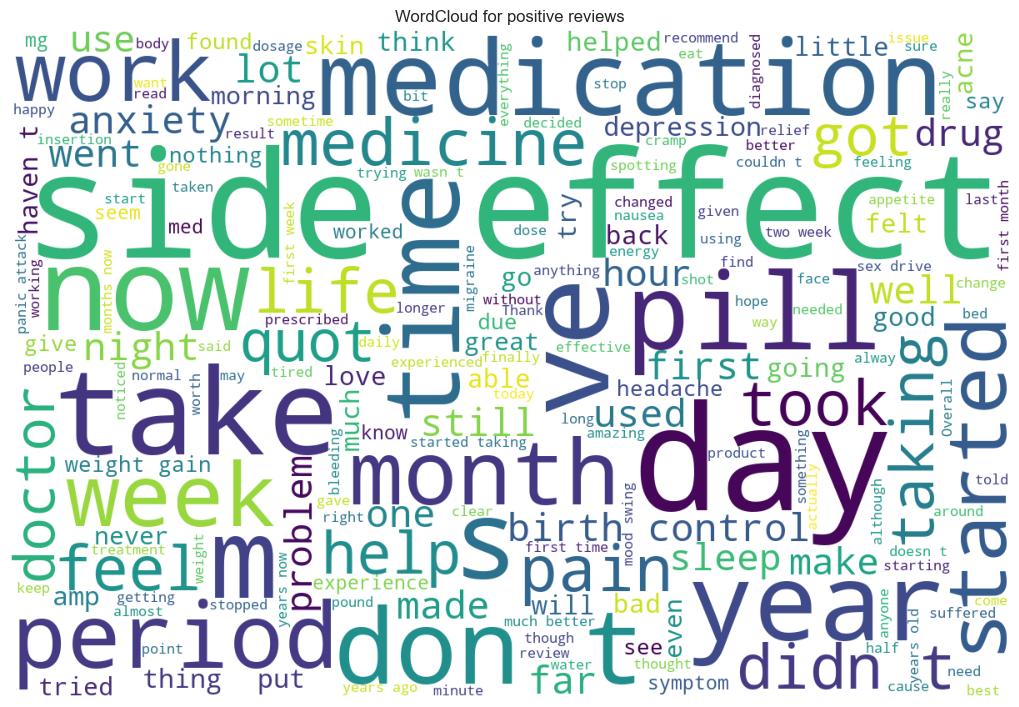

In [15]:

from wordcloud import WordCloud
from wordcloud import STOPWORDS
positive_reviews = " ".join([review for review in df['review'][df['review_sentiment'] == 1]])
stop_words = set(STOPWORDS)
wordcloud = WordCloud(width = 1200, height = 800,background_color ='white',stopwords = stop_words,min_font_size = 10).generate(positive_reviews)

# plot the WordCloud image
plt.figure(figsize = (10, 8))
plt.imshow(wordcloud)
plt.title('WordCloud for positive reviews')
plt.axis("off")
plt.tight_layout()
plt.show()

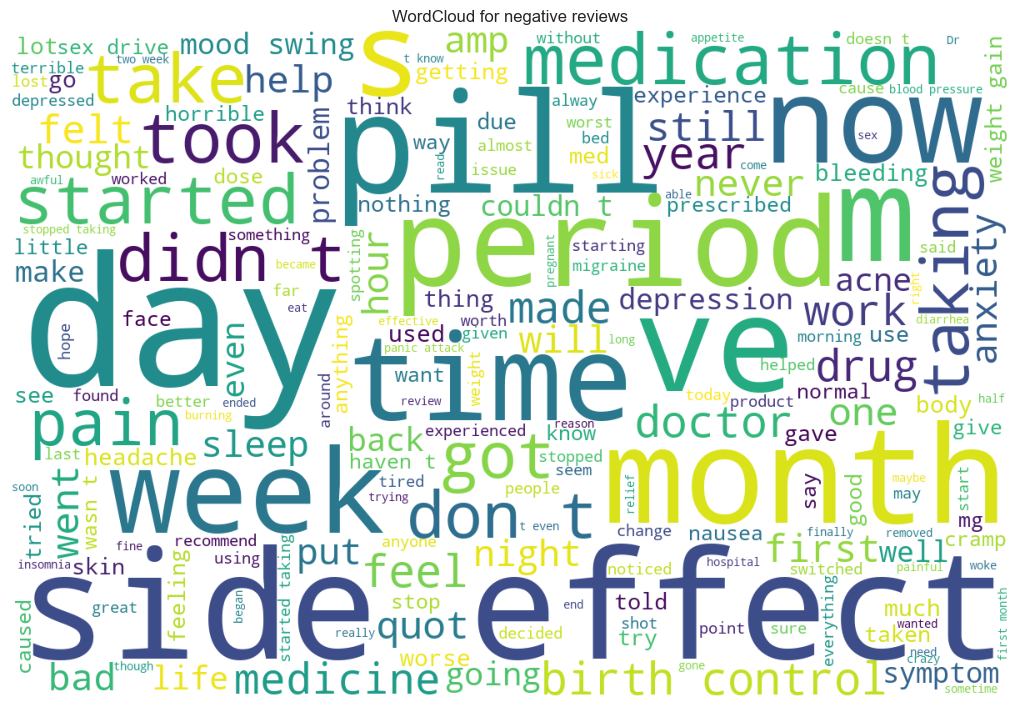

In [16]:

negative_reviews = " ".join([review for review in df['review'][df['review_sentiment'] == 0]])
wordcloud = WordCloud(width = 1200, height = 800,background_color ='white',stopwords = stop_words,min_font_size = 10).generate(negative_reviews)
# plot the WordCloud image
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud)
plt.title('WordCloud for negative reviews')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [17]:
import re
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

def preprocess_text(text_data):

    text_data = decontracted(text_data)
    
    text_data = text_data.replace('\n',' ')
    text_data = text_data.replace('\r',' ')
    text_data = text_data.replace('\t',' ')
    text_data = text_data.replace('-',' ')
    text_data = text_data.replace("/",' ')
    text_data = text_data.replace(">",' ')
    text_data = text_data.replace('"',' ')
    text_data = text_data.replace('?',' ')
    return text_data
  
# loading stop words from nltk library

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

#removing 'no' from the stop words list as there is an importance of 'side effects' and 'no side effects' in review
stop_words.remove('no')

def nlp_preprocessing(review):
    '''This functional block preprocess the text df by removing digits, extra spaces, stop words 
    and converting words to lower case and stemming words'''
    
    if type(review) is not int:
        string = ""
        review = preprocess_text(review)
        review = re.sub('[^a-zA-Z]', ' ', review)
        review = re.sub('\s+',' ', review)
        review = review.lower()
        for word in review.split():
            if not word in stop_words:
                word = stemmer.stem(word)
                string += word + " "
        return string 
      
df['cleaned_review'] = df['review'].apply(nlp_preprocessing)

In [18]:
# df.to_csv('cleaned_data.csv',index=False)

In [19]:
import string

df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

#Unique word count 
df['unique_word_count']=df["cleaned_review"].apply(lambda x: len(set(str(x).split())))

In [20]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\BaAr349\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [21]:
# Sentiment Analysis using VADER

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
df['sentiment_score'] = [sid.polarity_scores(v)['compound'] for v in df['review']]
df['sentiment_score_clean'] = [sid.polarity_scores(v)['compound'] for v in df['cleaned_review']]



In [22]:
df.head(5)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,review_sentiment,cleaned_review,year,unique_word_count,sentiment_score,sentiment_score_clean
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,2012-05-20,27,1,no side effect take combin bystol mg fish oil,2012,9,-0.2960,-0.2960
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,2010-04-27,192,1,son halfway fourth week intuniv becam concern ...,2010,54,0.8603,0.6929
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,2009-12-14,17,0,use take anoth oral contracept pill cycl happi...,2009,49,0.7962,0.2732
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,2015-11-03,10,1,first time use form birth control glad went pa...,2015,26,0.7184,0.1027
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,2016-11-27,37,1,suboxon complet turn life around feel healthie...,2016,52,0.9403,0.8934


In [23]:
import pandas as pd
import spacy
from tqdm import tqdm
from multiprocessing import Pool, cpu_count

# Load spaCy model
nlp = spacy.load("en_core_web_sm")


In [29]:
df.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'review_sentiment', 'cleaned_review', 'year',
       'unique_word_count', 'sentiment_score', 'sentiment_score_clean'],
      dtype='object')

In [30]:
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,review_sentiment,cleaned_review,year,unique_word_count,sentiment_score,sentiment_score_clean
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,2012-05-20,27,1,no side effect take combin bystol mg fish oil,2012,9,-0.2960,-0.2960
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,2010-04-27,192,1,son halfway fourth week intuniv becam concern ...,2010,54,0.8603,0.6929
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,2009-12-14,17,0,use take anoth oral contracept pill cycl happi...,2009,49,0.7962,0.2732
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,2015-11-03,10,1,first time use form birth control glad went pa...,2015,26,0.7184,0.1027
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,2016-11-27,37,1,suboxon complet turn life around feel healthie...,2016,52,0.9403,0.8934


In [33]:
X = df.drop(['Unnamed: 0','review','rating','date','review_sentiment'],axis=1)
y = df['review_sentiment'].values

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.30,random_state=42)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.30,random_state=42)


In [35]:
ngram_vec_bow = CountVectorizer(min_df=10,ngram_range=(2,4))
ngram_vec_bow.fit(X_train['cleaned_review'].values)

# Selecting the ngrams if only 'no' exists in it.

vocab = []
for i in ngram_vec_bow.get_feature_names_out():
    if 'no' in i.split(' '):
        vocab.append(i)
print('The Vocab size with only "no" in words is',len(vocab))
print(50*'-')
ngram_vec_bow = CountVectorizer(ngram_range=(2,4),vocabulary=vocab)
print('New vectorizer vocab size:',ngram_vec_bow.get_feature_names_out().shape[0])
print('Saving the new vectorizer with above selected vocabulary..')


The Vocab size with only "no" in words is 1678
--------------------------------------------------
New vectorizer vocab size: 1678
Saving the new vectorizer with above selected vocabulary..


In [38]:
from gensim.models import Word2Vec

sentences = []
for r in tqdm(df['cleaned_review']):
    sentences.append(r.split())

model = Word2Vec(sentences,vector_size=300,workers=12,min_count=1)

def create_w2v(df,feature):

    w2v_vector =[]
    for review in df[feature]:
        vector = np.zeros(300)
        
        for word in review.split():
            if word in model.wv.key_to_index:
                vector += model.wv[word]
            
        w2v_vector.append(vector)
    w2v_vector = np.array(w2v_vector)
    return w2v_vector

create_w2v(df,"cleaned_review" )

100%|██████████| 161297/161297 [00:01<00:00, 155848.39it/s]


array([[  3.43433902,  -3.13694789,  -0.90457205, ...,   1.53635184,
         -3.83590378,   0.94173029],
       [ 16.220073  ,   1.35509249,   9.50156493, ...,  -2.55026804,
        -11.42103346,  13.83362091],
       [ 28.05590744, -25.03321228,  10.62240108, ...,  -7.02386089,
         -9.95113233,   0.48137173],
       ...,
       [  2.78055796,  -2.48795672,   1.83951364, ...,   5.98266718,
         -1.24984669,  -0.99603162],
       [ -6.64019825,   6.0748421 ,   0.88785387, ...,  10.99241838,
        -21.38224302,   1.29189287],
       [  9.8314555 ,  -5.88496612,   4.27722567, ...,   0.44855867,
        -11.49928377,  -6.5328243 ]])

In [43]:
passive_tf = PassiveAggressiveClassifier()
passive_tf.fit(X_train , y_train)
pred = passive_tf.predict(X_test)
score = metrics.accuracy_score(pred,y_test)
print(score)


ValueError: could not convert string to float: 'Metronidazole'

In [41]:
def recommend(condition):
    '''this function takes the given condition as input and returns the top drugs based on highest rec scores'''
    
    data = pd.read_csv("drugsComTrain_raw.tsv",sep="\t")
    select = data[data['condition']==condition]
    drug_count = select['drugName'].nunique()
    select['rec_score'] = select['rec_score']/drug_count
    group_drug = select.groupby(['drugName']).agg({'rec_score':['sum']})
    group_drug = group_drug[('rec_score', 'sum')].sort_values(ascending=False)
    drug_score = dict(group_drug)
    if len(drug_score)>5:
        print('Top 5 Drugs for the condition : {0}'.format(condition.upper()))
        for i in list(drug_score.keys())[0:5]:
            print('->',i)        
            
    else:
        print('Top  Drugs for the condition : {0}'.format(condition.upper()))
        for i in drug_score.keys():
            print('->',i)

In [42]:
recommend('Depression')

KeyError: 'rec_score'

In [ ]:
def userful_count(data,feature):
    '''this function takes dataframe and feature as input and normalize the given feature'''
    
    max_value = data[feature].max()
    min_value = data[feature].min()
    data[feature] = (data[feature] - min_value) / (max_value - min_value)
    return data 

X_test['model2'] = model_2.predict(X_te_2)


X_test =  userful_count(X_test,'usefulCount') 

X_test['rec_score'] = (X_test['model2']+X_test['model3']+X_test['model4']+X_test['model5']+X_test['model6'])*X_test['usefulCount']